# 1. Setup and Load Data

### 1.1 Install Dependencies and Setup

In [1]:
# !pip install tensorflow opencv-python matplotlib

In [2]:
# !pip list

In [4]:
import tensorflow as tf

In [5]:
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [7]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,true)

### 1.2 Remove Dodgy/ Sussy Images

In [9]:
import cv2
import imghdr

C:\Users\warda\AppData\Local\Temp\ipykernel_112260\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
data_dir = 'data'

In [11]:
image_exts = ['jpeg','jpg','bmp','png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
# After running this code go to your file that includes all of these photos and delete the ones that are under 10 KB

### 1.3 Load Data

In [15]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [16]:
import numpy as np

In [17]:
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 861 files belonging to 10 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [63]:
batch = data_iterator.next()

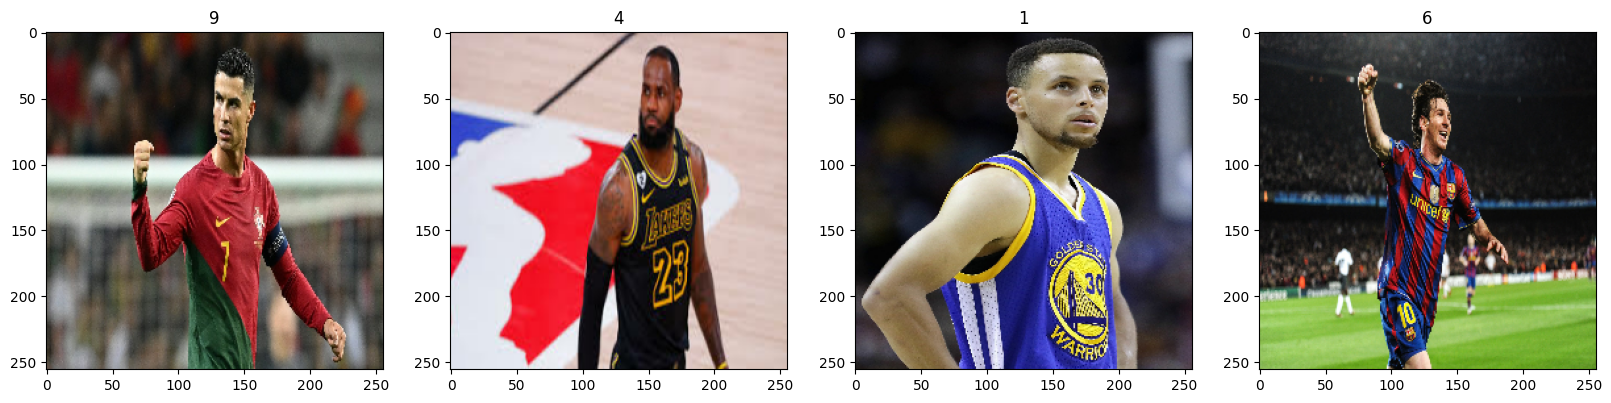

In [64]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

### 2.1 Scale Data

In [32]:
data = data.map(lambda x, y: (x/255, y))

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

In [35]:
batch[0].max()

np.float32(1.0)

### 2.2 Split Data

In [36]:
len(data)

27

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+2

In [38]:
train_size

18

In [39]:
val_size

5

In [40]:
test_size

4

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
len(test)

4

In [43]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 3. Deep Model

### 3.1 Build Deep Learning Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(16, (3,3), 1, w', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\warda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [49]:
logdir='logs'

In [50]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.1361 - loss: -1491.4948 - val_accuracy: 0.0812 - val_loss: -27155.7129
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.1165 - loss: -94373.3125 - val_accuracy: 0.0938 - val_loss: -782673.7500
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.1074 - loss: -1649007.7500 - val_accuracy: 0.1187 - val_loss: -7792625.5000
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.1230 - loss: -13844334.0000 - val_accuracy: 0.0625 - val_loss: -45247720.0000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1110 - loss: -75230664.0000 - val_accuracy: 0.1125 - val_loss: -204450208.0000
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.1337 - loss: -291738560.0000 - val_accuracy: 0.0938 - val_loss: -736691712.0000
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.1351 - loss: -922857920.0000 - val_accuracy: 0.0437 - val_loss: -2140748032.0000
Epoch 8/20
18/

### 3.3 Plot Performance

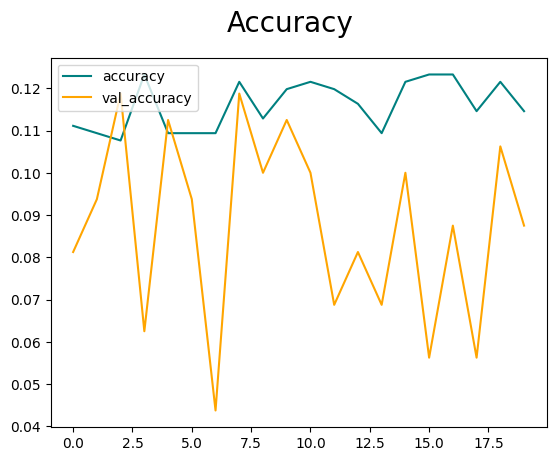

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

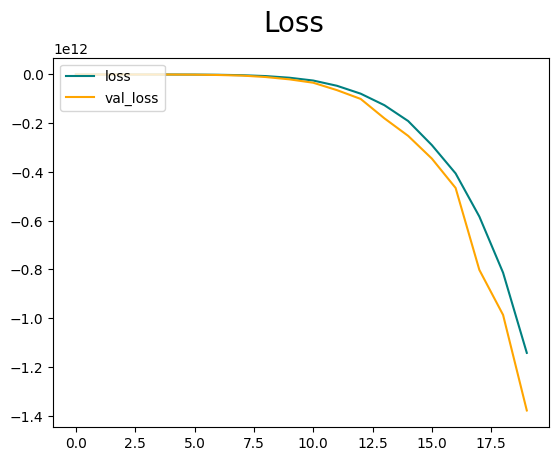

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
len(test)

4

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


In [59]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9359999895095825, Recall:1.0, Accuracy:0.07999999821186066


### 4.2 Test

In [60]:
import cv2

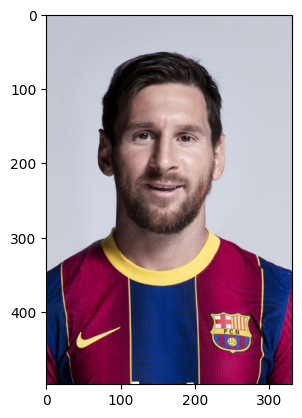

In [65]:
img = cv2.imread('messitest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

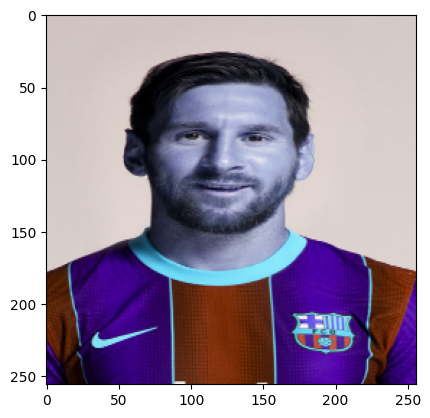

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [68]:
yhat

array([[1.]], dtype=float32)

In [71]:
if yhat <= 1.5: 
    print(f'Predicted class is Steph Curry')
else:
    print(f'Predicted class is Happy')

Predicted class is Steph Curry


# 5. Save the Model

### 5.1 Save the Model